# ANALYSE DE L'EVOLUTION DU PRIX DE L'OR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline             
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from matplotlib.pylab import rcParams

# 1. Analyse exploratoire

#### Affichage des données

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
DF = pd.read_csv('FINAL_USO.csv',index_col='Date', parse_dates=True)
df = DF.copy()
df.head(2)

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.0,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.7,615.00,614.6,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.68,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.8,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.6,623.45,622.3,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.68,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800


### a. Identification de la target

In [4]:
df['Adj Close'][:2]

Date
2011-12-15    152.330002
2011-12-16    155.229996
Name: Adj Close, dtype: float64

La variable d'étude est la variable Adj Close qui représente içi le cours de
clôture ajusté d'une action est variable continue

### b. Nombre des lignes et de colonnes

In [5]:
df.shape

(1718, 80)

Le jeu de données soumit à notre étude comporte 1718 lignes et 80 colonnes

In [6]:
df.index

DatetimeIndex(['2011-12-15', '2011-12-16', '2011-12-19', '2011-12-20',
               '2011-12-21', '2011-12-22', '2011-12-23', '2011-12-27',
               '2011-12-28', '2011-12-29',
               ...
               '2018-12-17', '2018-12-18', '2018-12-19', '2018-12-20',
               '2018-12-21', '2018-12-24', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=1718, freq=None)

<AxesSubplot:xlabel='Adj Close', ylabel='Density'>

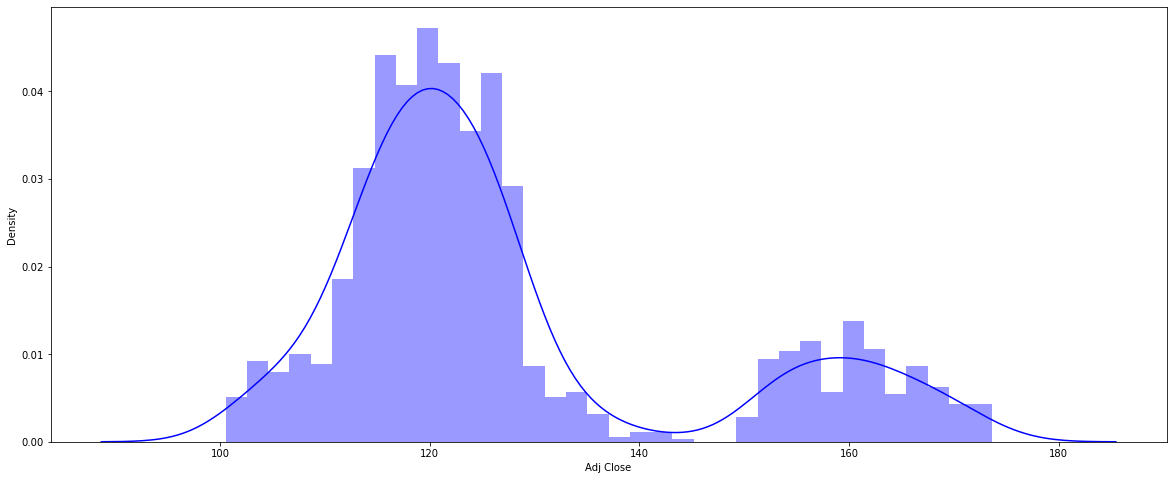

In [7]:
plt.figure(figsize=(20,8))
sns.distplot(df["Adj Close"], color='blue')

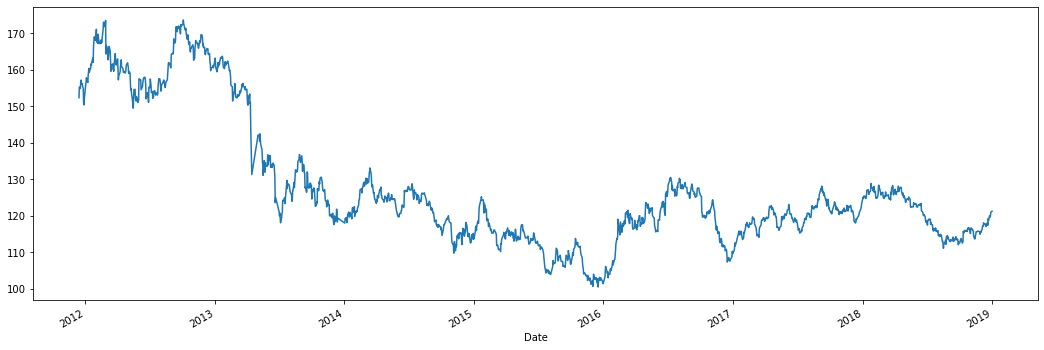

In [8]:
plt.figure(figsize=(18, 6))
df['Adj Close'].plot()
plt.show()

In [9]:
df_index = pd.DataFrame(df['Adj Close'])
type(df_index)

pandas.core.frame.DataFrame

In [10]:
#Determine rolling statistics

In [11]:
rolmean = df_index.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = df_index.rolling(window=12).std()
print(rolmean,rolstd)

             Adj Close
Date                  
2011-12-15         NaN
2011-12-16         NaN
2011-12-19         NaN
2011-12-20         NaN
2011-12-21         NaN
...                ...
2018-12-24  118.093333
2018-12-26  118.224167
2018-12-27  118.465000
2018-12-28  118.758333
2018-12-31  119.046667

[1718 rows x 1 columns]             Adj Close
Date                 
2011-12-15        NaN
2011-12-16        NaN
2011-12-19        NaN
2011-12-20        NaN
2011-12-21        NaN
...               ...
2018-12-24   0.845676
2018-12-26   0.958972
2018-12-27   1.153126
2018-12-28   1.330501
2018-12-31   1.469250

[1718 rows x 1 columns]


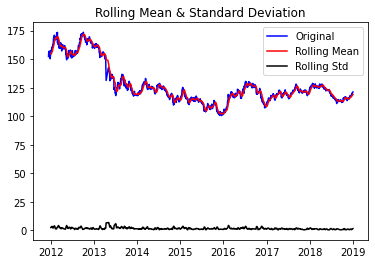

In [12]:
#Plot rolling statistics
orig = plt.plot(df_index, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Moyenne mobile & Ecart type')
plt.show(block=False)

Dans le graphique ci-dessus, nous voyons que la moyenne mobile a elle-même une composante de tendance même si l'écart type mobile est assez constant dans le temps. Pour que notre série temporelle soit stationnaire, nous devons nous assurer que les deux statistiques mobiles, à savoir la moyenne et l'écart-type, restent invariantes ou constantes dans le temps. Ainsi, les courbes de ces deux statistiques doivent être parallèles à l'axe des x, ce qui n'est pas le cas dans notre cas.

Pour renforcer notre hypothèse selon laquelle la série temporelle n'est pas stationnaire, nous allons effectuer le test ADCF.

In [54]:
#Effectuons le test de Dickey-Fuller augmenté:
print('Résultats du test de Dickey Fuller:')
dftest = adfuller(df_index['Adj Close'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags utilisés','Nombre observations utilisées'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Résultats du test de Dickey Fuller:
Test Statistic                     -1.823460
p-value                             0.368878
#Lags utilisés                      1.000000
Nombre observations utilisées    1716.000000
Critical Value (1%)                -3.434166
Critical Value (5%)                -2.863226
Critical Value (10%)               -2.567667
dtype: float64


Pour qu'une série temporelle soit stationnaire, son test ADCF devrait avoir :

une p-value faible (selon l'hypothèse nulle).
D'après le résultat du test ADCF ci-dessus, nous constatons que la valeur p est très élevée. De plus, les valeurs critiques ne sont pas proches des statistiques de test. Par conséquent, nous pouvons dire sans risque que notre série chronologique n'est pas stationnaire pour le moment.

# Transformation des données pour atteindre la stationnarité 

Il existe plusieurs façons d'obtenir la stationnarité par la transformation des données, par exemple en prenant log10 , loge , carré, racine carrée, cube, racine cubique, décroissance exponentielle, décalage temporel, etc...

Dans notre carnet de notes, commençons par les transformations logarithmiques. Notre objectif est d'éliminer la composante de tendance. Par conséquent, des courbes plus plates (c'est-à-dire parallèles à l'axe des x) pour les séries temporelles et une moyenne mobile après la transformation logarithmique indiquent que la transformation des données a bien fonctionné.

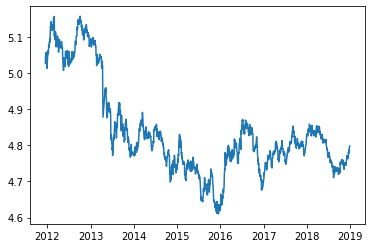

In [13]:
#Estimation de la tendance
df_index_log = np.log(df_index)
plt.plot(df_index_log)

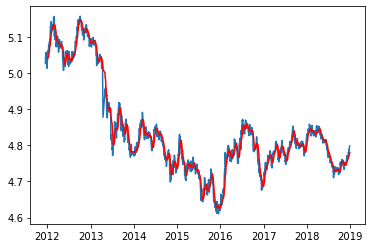

In [14]:
#La transformation suivante est nécessaire pour rendre la série stationnaire
movingAverage = df_index_log.rolling(window=12).mean()
movingSTD = df_index_log.rolling(window=12).std()
plt.plot(df_index_log)
plt.plot(movingAverage, color='red')

A partir du graphique ci-dessus, nous voyons que même si la moyenne mobile n'est pas stationnaire, elle est toujours meilleure que le cas précédent, où aucune transfromation n'a été appliquée aux séries. Nous pouvons donc au moins dire que nous allons dans la bonne direction.

Nous savons d'après le graphique ci-dessus que la série temporelle avec une échelle logarithmique ainsi que sa moyenne mobile ont une composante de tendance. Nous pouvons donc appliquer une intuition élémentaire : la soustraction de l'une à l'autre devrait supprimer la composante de tendance des deux. C'est comme si :

logscaleL=stationarypart(L1)+trend(LT) 
movingavgoflogscaleA=partstationnaire(A1)+tendance(AT)
série de résultatsR=L-A=(L1+LT)-(A1+AT)=(L1-A1)+(LT-AT)
Puisque L et A sont des séries et qu'il s'agit d'une moyenne mobile, leur tendance sera plus ou moins la même.
LT-AT est presque égal à 0

Ainsi, la composante de tendance sera presque éliminée. Et nous avons,

R=L1-A1, notre courbe finale sans tendance.

In [15]:
df_index_log_mv = df_index_log - movingAverage
df_index_log_mv.head(12)

#Supprimer des valeurs manquantes
df_index_log_mv.dropna(inplace=True)
df_index_log_mv.head(10)

,Adj Close
Date,
2012-01-03,0.009738
2012-01-04,0.012430
2012-01-05,0.017877
2012-01-06,0.012949
2012-01-09,0.008742
2012-01-10,0.021542
2012-01-11,0.026097
2012-01-12,0.028392
2012-01-13,0.019076


In [16]:
def test_stationarity(timeseries):
    
    #Déterminer les statistiques de roulement
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['Adj Close'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

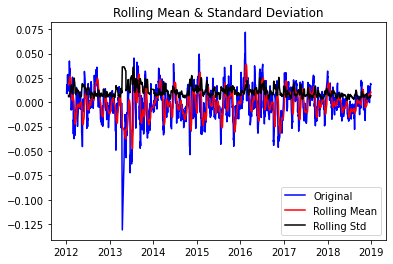

Results of Dickey Fuller Test:
Test Statistic                -9.746019e+00
p-value                        8.252097e-17
#Lags Used                     1.300000e+01
Number of Observations Used    1.693000e+03
Critical Value (1%)           -3.434218e+00
Critical Value (5%)           -2.863249e+00
Critical Value (10%)          -2.567680e+00
dtype: float64


In [17]:
test_stationarity(df_index_log_mv)

A partir du graphique ci-dessus, nous observons que notre intuition selon laquelle "la soustraction de deux séries liées ayant des composantes de tendance similaires rendra le résultat stationnaire" est vraie. Nous constatons que :

La valeur p a été réduite considérablement
Ainsi, nous pouvons dire que notre série donnée est stationnaire.
Mais, dans l'esprit d'obtenir une plus grande précision, explorons et essayons de trouver une meilleure échelle que notre log actuel.

Essayons la décroissance exponentielle.

# Transformation de la décroissance exponentielle

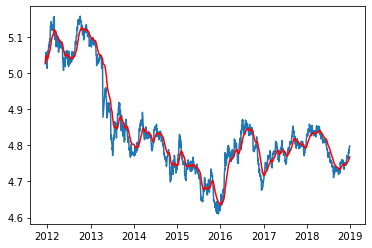

In [18]:
exponentialDecayWeightedAverage = df_index_log.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(df_index_log)
plt.plot(exponentialDecayWeightedAverage, color='red')

D'après le graphique ci-dessus, il semble que la décroissance exponentielle ne présente aucun avantage par rapport à l'échelle logarithmique, car les deux courbes correspondantes sont similaires. Mais, en statistiques, on ne peut pas tirer de conclusions simplement en regardant les courbes. Par conséquent, nous effectuons à nouveau le test ADCF sur les séries de décroissance ci-dessous.

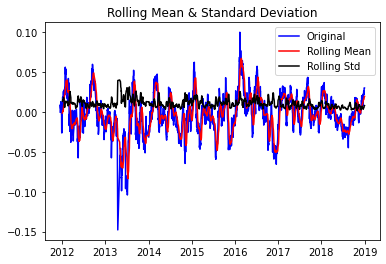

Results of Dickey Fuller Test:
Test Statistic                -7.017112e+00
p-value                        6.688519e-10
#Lags Used                     1.000000e+00
Number of Observations Used    1.716000e+03
Critical Value (1%)           -3.434166e+00
Critical Value (5%)           -2.863226e+00
Critical Value (10%)          -2.567667e+00
dtype: float64


In [19]:
datasetLogScaleMinusExponentialMovingAverage = df_index_log - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusExponentialMovingAverage)

Nous observons que la série temporelle est stationnaire et que les séries de la moyenne mobile et de l'écart-type sont presque parallèles à l'axe des x, ce qui signifie qu'elles n'ont pas de tendance.


# Time Shift Transformation ¶

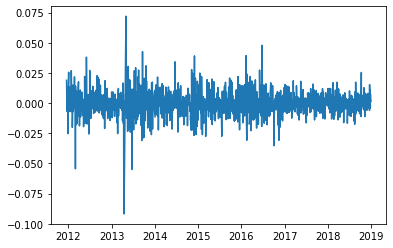

In [31]:
datasetLogDiffShifting = df_index_log - df_index_log.shift()
plt.plot(datasetLogDiffShifting)

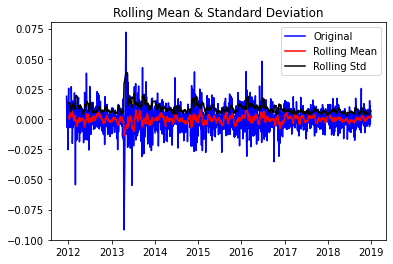

Results of Dickey Fuller Test:
Test Statistic                  -44.337088
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    1716.000000
Critical Value (1%)              -3.434166
Critical Value (5%)              -2.863226
Critical Value (10%)             -2.567667
dtype: float64


In [32]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

A partir des deux graphiques ci-dessus, nous pouvons voir que, visuellement, c'est le meilleur résultat car notre série, avec les valeurs statistiques mobiles de la moyenne mobile et de l'écart type mobile, est très plate et stationnaire. Mais, le test ADCF nous montre que :

La valeur p de 0,07 n'est pas aussi bonne que celle de 0,005 de la décroissance exponentielle.
La valeur de la statistique de test n'est pas aussi proche des valeurs critiques que celle de la décroissance exponentielle.
Nous avons donc essayé 3 transformations différentes : log, exp decay & time shift. Pour plus de simplicité, nous allons opter pour l'échelle logarithmique. La raison de ce choix est que nous pouvons revenir à l'échelle originale pendant la prévision.



# Décomposition

Décomposons maintenant les 3 composants de la série de l'échelle logarithmique en utilisant une fonction de la bibliothèque du système. Une fois que nous avons séparé les composantes, nous pouvons simplement ignorer la tendance et la saisonnalité et vérifier la nature de la partie résiduelle.

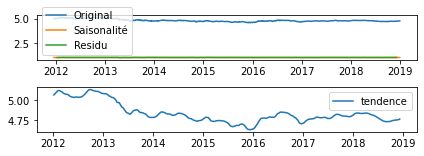

In [58]:
decomposition = seasonal_decompose(df_index_log,model='multiplicative',period=30) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(df_index_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='tendence')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Saisonalité')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residu')
plt.legend(loc='best')

plt.tight_layout()

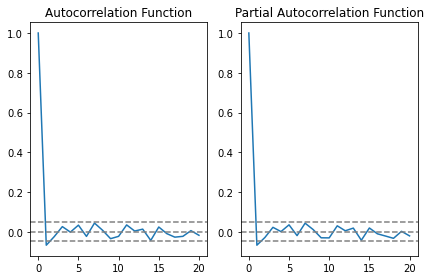

In [35]:
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')

#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('fonction d'autocorrélation')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color='gray')
plt.title('Fonction d'autocorrélation partielle')
            
plt.tight_layout()

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


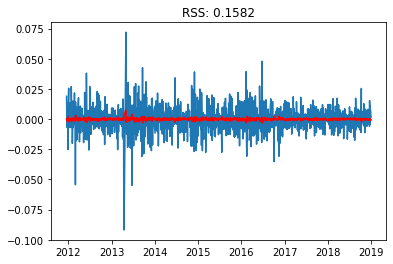

In [37]:
# Modele AR
model = ARIMA(df_index_log, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - datasetLogDiffShifting['Adj Close'])**2))
print('Plotting AR model')

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting MA model


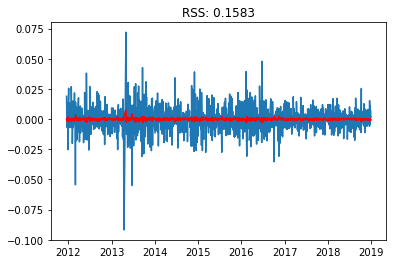

In [39]:
# Modele AR
model = ARIMA(df_index_log, order=(0,1,2))
results_MA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues - datasetLogDiffShifting['Adj Close'])**2))
print('Tracé du modèle MA')

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting ARIMA model


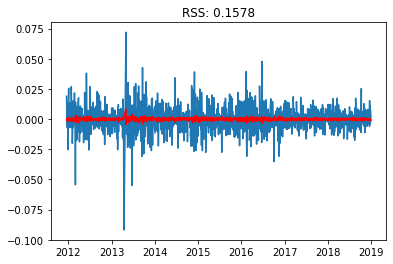

In [41]:
# AR+I+MA = ARIMA model
model = ARIMA(df_index_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Adj Close'])**2))
print('Plotting ARIMA model')

In [42]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date
2011-12-16   -0.000134
2011-12-19   -0.001413
2011-12-20   -0.000521
2011-12-21   -0.000591
2011-12-22   -0.001029
dtype: float64


In [43]:
#Convertir en somme cumulée
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

Date
2011-12-16   -0.000134
2011-12-19   -0.001547
2011-12-20   -0.002067
2011-12-21   -0.002658
2011-12-22   -0.003687
                ...   
2018-12-24   -0.227336
2018-12-26   -0.227745
2018-12-27   -0.228418
2018-12-28   -0.228346
2018-12-31   -0.229629
Length: 1717, dtype: float64


In [46]:
predictions_ARIMA_log = pd.Series(df_index_log['Adj Close'].iloc[0], index=df_index_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2011-12-15    5.026049
2011-12-16    5.025916
2011-12-19    5.024503
2011-12-20    5.023982
2011-12-21    5.023391
dtype: float64

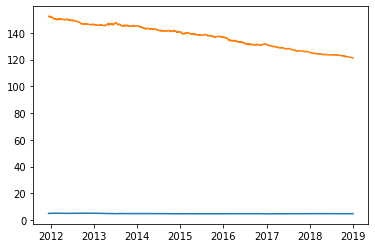

In [47]:
# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df_index_log)
plt.plot(predictions_ARIMA)

In [48]:
df_index_log

,Adj Close
Date,
2011-12-15,5.026049
2011-12-16,5.044908
2011-12-19,5.042586
2011-12-20,5.056118
2011-12-21,5.057264
...,...
2018-12-24,4.787658
2018-12-26,4.784654
2018-12-27,4.792230


C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'
C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


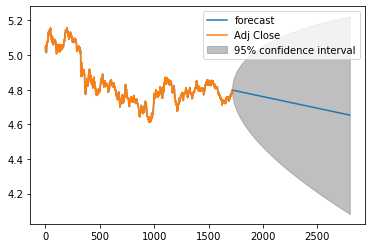

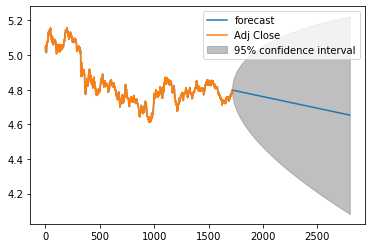

In [71]:
#Nous avons 1700 points de données (données existantes de 7 ans en mois). 
#Et nous voulons faire des prévisions pour des points de données supplémentaires, soit 3 ans.
results_ARIMA.plot_predict(1,2800) 
#x=résultats_ARIMA.forecast(steps=120)